In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
raw_path = 'L:/PG-Nanoteknologi/Data/instrument comparison/rawdata/'
dm_path = raw_path + 'dm'
dm_names = ['dm1', 'dm4', 'dm5']
ma_path = raw_path + 'ma200'
LCS_path = raw_path + 'LCS'

discmini = read_discmini(dm_path, parent_path, dm_names, '\t')
ma200 = read_csv_BC(ma_path, parent_path)
LCS = read_LCS_data(LCS_path, parent_path, 'Timestamp', 2)
SMPS = read_SMPS(raw_path, parent_path, 2)


c:\Users\B363580\Documents\GitHub\Master-thesis\calibration\..\read_data_functions.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[key][new_df[key] < 0] = 0
c:\Users\B363580\Documents\GitHub\Master-thesis\calibration\..\read_data_functions.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[key][new_df[key] < 0] = 0
c:\Users\B363580\Documents\GitHub\Master-thesis\calibration\..\read_data_functions.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

Fit: a=0.251975  b=692.738  R2=0.145031
Fit: a=0.015580  b=966.183  R2=0.000720
Fit: a=0.012177  b=1165.433  R2=0.000569


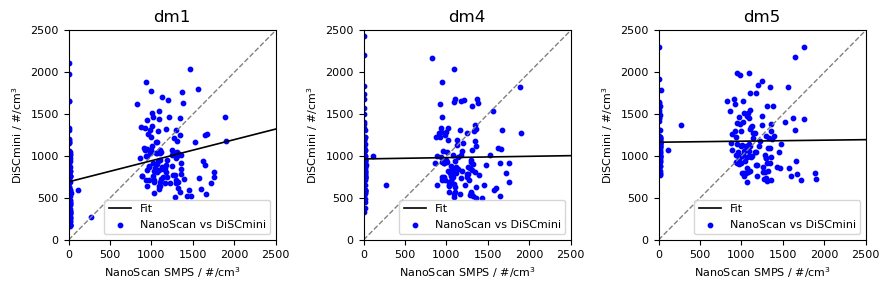

In [3]:
x_dm = np.linspace(0, 2500, 100)
conc_lbl = ['Number', 'Total Conc']
time_lbl = ['Time', 'Time']
ax_lbl = ['NanoScan SMPS / #/cm$^{3}$', 'DiSCmini / #/cm$^{3}$']
timestamp = ['2024-09-20 11:37:00', '2024-09-20 15:40:00']

fig, ax = plt.subplots(1, 3, figsize = (9, 3))

instrument_comparison(ax, discmini, dm_names, SMPS['2024_09_22-16_52_40_SCAN'], conc_lbl, time_lbl, x_dm, ax_lbl, timestamp)
for i, key in enumerate(dm_names):
    ax[i].set_title(key)

fig.tight_layout()
fig.savefig('SMPS_vs_DiSCmini.png', dpi = 600)
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

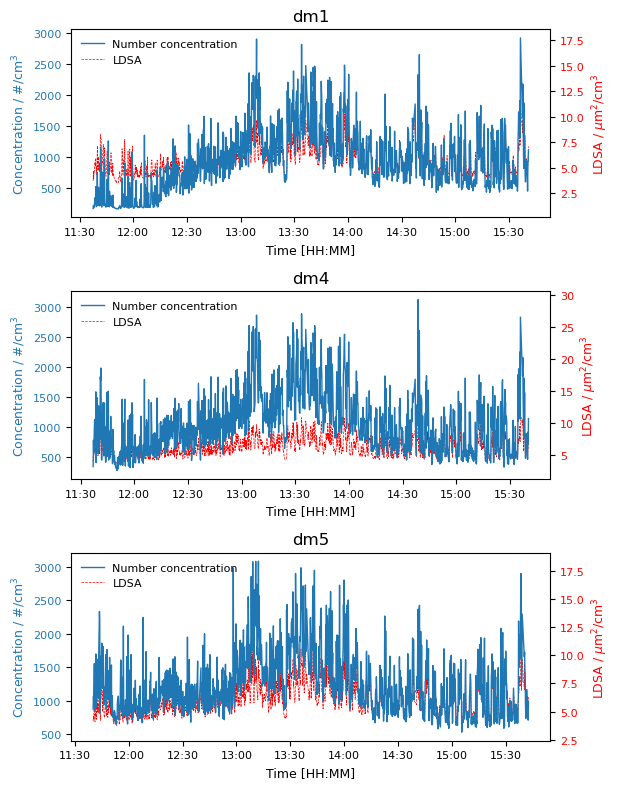

In [4]:
fig, ax = plt.subplots(3,1, figsize = (6.3, 8))

discmini_multi_timeseries(ax, discmini, dm_names, [100, 10, 5], dm_names)

fig.tight_layout()
plt.show()